1. EDA
2. Product Analytics (trend, etc)
3. Cohort analysis

As an AI text model, I can't directly access external links or files, including the one you've provided. However, I can guide you through the process of performing Exploratory Data Analysis (EDA) on the dataset you've linked.

1. **Import the Data**: Download the dataset from the provided link and import it into your preferred data analysis tool or programming environment like Python (using pandas), R, or any other tool you're comfortable with.

2. **Check the Data Structure**: Look at the dimensions of the dataset (number of rows and columns) and examine the first few rows to understand what kind of data you're dealing with.

3. **Handle Missing Values**: Check for missing values in the dataset and decide on a strategy to handle them, whether by imputation, deletion, or other methods.

4. **Summary Statistics**: Compute summary statistics for numerical variables such as mean, median, standard deviation, minimum, and maximum values to understand the distribution and range of the data.

5. **Data Visualization**: Create visualizations such as histograms, box plots, scatter plots, and bar plots to gain insights into the distribution of variables, relationships between variables, and any patterns or trends in the data.

6. **Customer Analysis**: Explore patterns in customer behavior such as frequency of purchases, average purchase value, and customer demographics if available.

7. **Product Analysis**: Analyze product sales trends, identify best-selling products, and explore correlations between different products.

8. **Time Series Analysis**: If applicable (e.g., if the dataset includes timestamps), conduct time series analysis to understand temporal patterns in sales or other relevant metrics.

9. **Market Basket Analysis**: Explore associations between products purchased together using techniques like association rule mining.

10. **Additional Analyses**: Depending on the specific characteristics of the dataset and your analytical goals, you may conduct additional analyses such as segmentation, clustering, or predictive modeling.

Remember, EDA is an iterative process, so it's essential to continuously explore and refine your analysis based on the insights you uncover.

In [553]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [554]:
# Define the components of the path
base_path = '.'  # Represents the current directory
relative_path = 'data'
file_name = 'Online Retail.csv'

full_path = os.path.join(base_path, relative_path, file_name)

# Load data
df = pd.read_csv(full_path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [555]:
# Analyze data
print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [556]:
# Check missing value
print(
    round(
        df.isnull().sum()/df.shape[0]*100, 3)
        .sort_values(ascending=False)
)

CustomerID     24.927
Description     0.268
InvoiceNo       0.000
StockCode       0.000
Quantity        0.000
InvoiceDate     0.000
UnitPrice       0.000
Country         0.000
dtype: float64


NOTES:
- Customer ID is difficult to guessed, Since our goals is to built cohort analysis and applied customer segmentation. It is better if we remove the customer ID to reduce bias.

- According to the data's field. Numerical field: 'Quantity' and 'UnitPrice', Date field: 'InvoiceDate', Id field: 'InvoiceNo', 'StockCode', and 'CustomerID', Text field: 'Description', and Categorical field: 'Country'

In [557]:
# df = df[df['CustomerID'].notna()]
df = df.dropna(subset=['Description', 'CustomerID'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [558]:
# EDA Numerical Data

df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


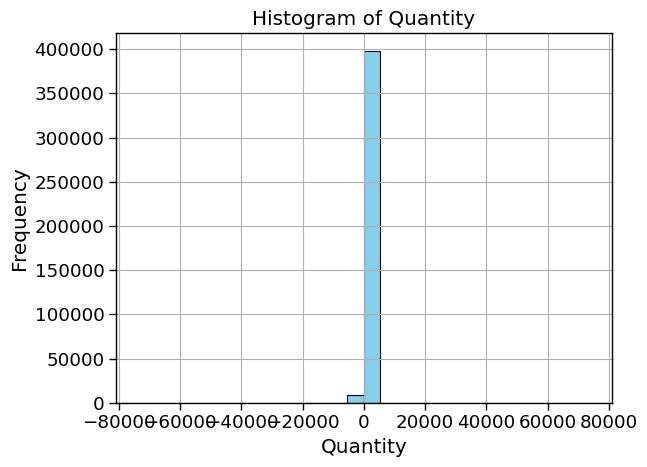

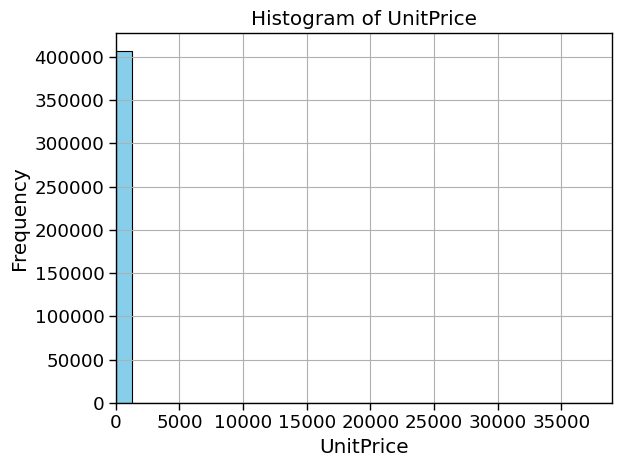

In [559]:
# Plot Distribution
def plot_hist(field, n=30):
    plt.hist(df[f'{field}'], bins=n, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {field}')
    plt.xlabel(f'{field}')
    plt.ylabel('Frequency')
    plt.xlim(min(df[f'{field}']), max(df[f'{field}']))
    plt.grid(True)
    plt.show()

plot_hist('Quantity')
plot_hist('UnitPrice')

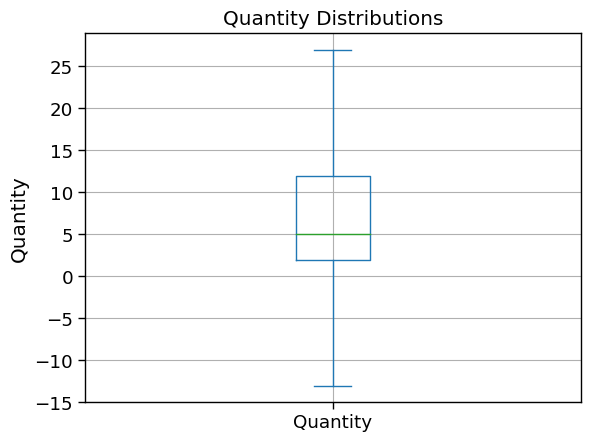

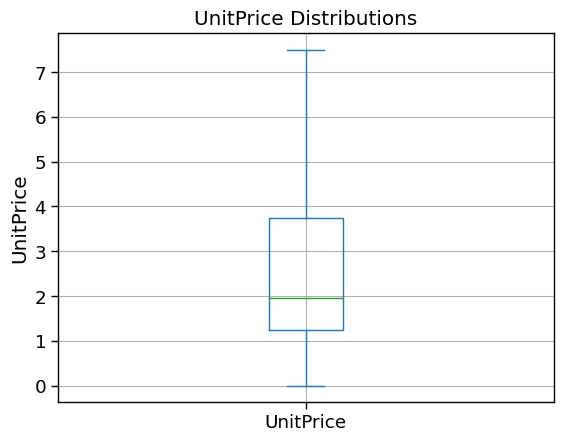

In [560]:
def boxplot(field):
    df[f'{field}'].plot.box(showfliers=False, grid=True)
    plt.ylabel(f'{field}')
    plt.title(f'{field} Distributions')
    plt.show()

boxplot('Quantity')
boxplot('UnitPrice')

In [561]:
# Detect Anomali
quantity_zero = len(df[df["Quantity"] <= 0])
perc_quantity_zero = quantity_zero/df.shape[0] * 100
unitprice_zero = len(df[df["UnitPrice"] == 0])
perc_unitprice_zero = unitprice_zero/df.shape[0] * 100


print("The data consist of", str(quantity_zero), "rows of data with item quantity less/equal than zero.")
print("About {:.2f}% of total data".format(perc_quantity_zero))
print("")
print("The data consist of", str(unitprice_zero), "rows of data with unit price equal to zero.")
print("About {:.2f}% of total data".format(perc_unitprice_zero))

The data consist of 8905 rows of data with item quantity less/equal than zero.
About 2.19% of total data

The data consist of 40 rows of data with unit price equal to zero.
About 0.01% of total data


In [562]:
# Remove anomali
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
# df = df[df['Quantity'] > 0]
# df = df[df['UnitPrice'] > 0]

df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,397884.000000,397884.000000
mean,12.988238,3.116488
std,179.331775,22.097877
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [564]:
df.nunique()

InvoiceNo      18532
StockCode       3665
Description     3877
Quantity         301
InvoiceDate    17282
UnitPrice        440
CustomerID      4338
Country           37
dtype: int64

In [565]:
# EDA Non-Numerical

df[['InvoiceNo', 'StockCode','CustomerID','Country']].nunique()

InvoiceNo     18532
StockCode      3665
CustomerID     4338
Country          37
dtype: int64

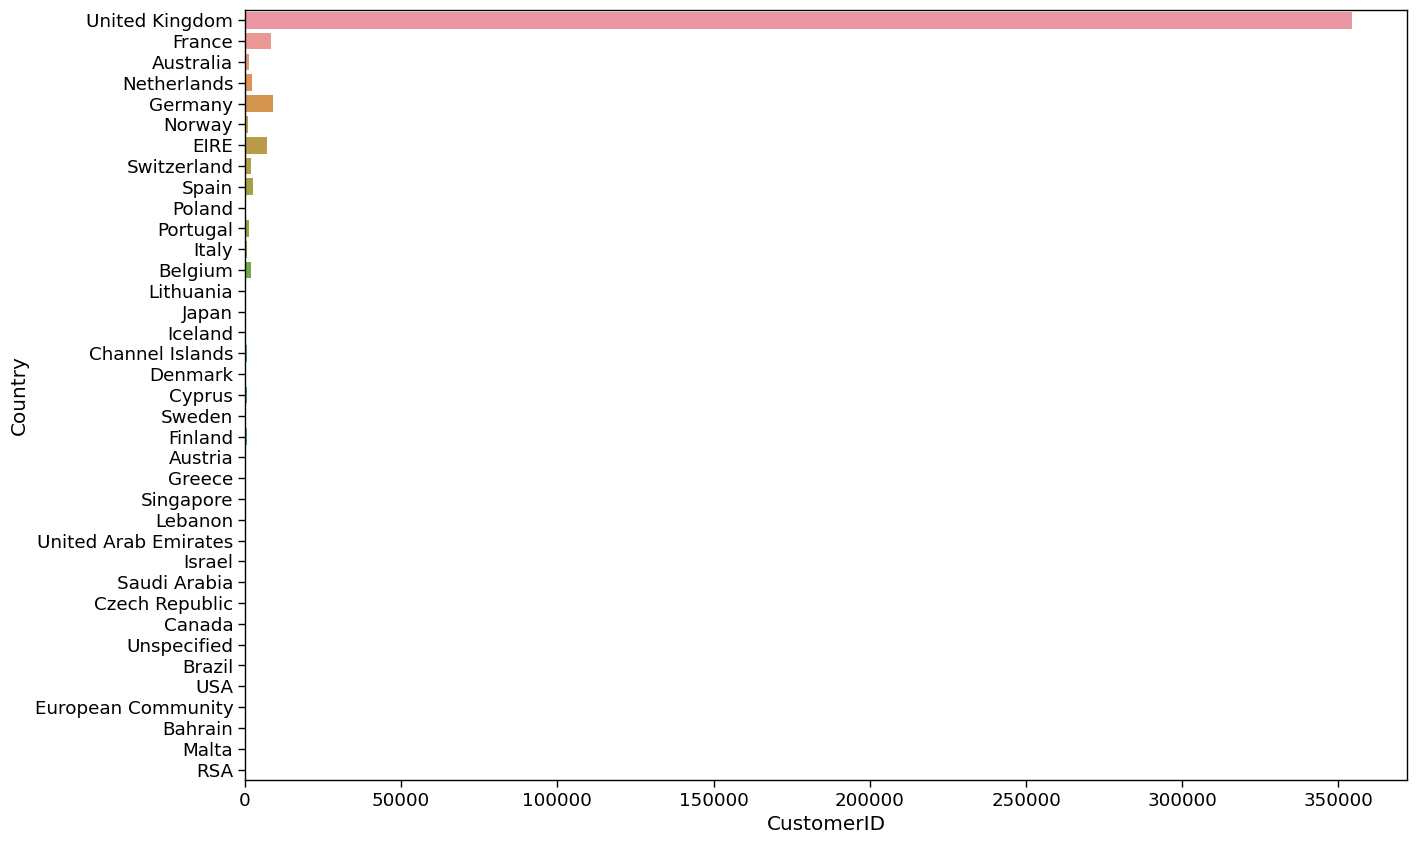

In [566]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(y = 'Country', x = 'CustomerID', data=df, estimator=np.count_nonzero)
plt.show()

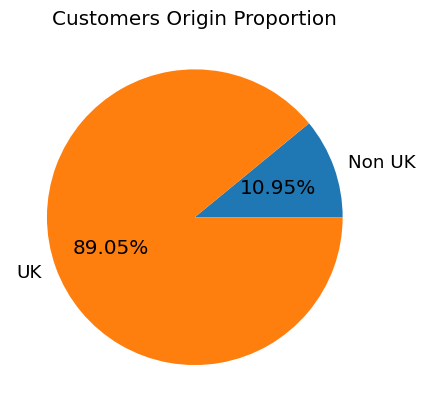

In [567]:
df['Country_isUK'] = np.where(df['Country'] == 'United Kingdom', 'UK', 'Non UK')

customers_origin = df.groupby(['Country_isUK']).size()

plt.title('Customers Origin Proportion')
plt.pie(customers_origin, labels=customers_origin.index, autopct=lambda p: f'{p:.2f}%')
plt.show()

NOTE:
- Terdapat 18532 transaksi, 3665 barang yang di beli, 4338 pelanggan, dan 37 negara.

- Karena perusahaan berdomisili di UK, maka kita dapat kategorikan tempat wilayah customer adalah UK dan non-UK.

- Penamaan negara sudah sesuai, tidak ada penamaan yang ganda

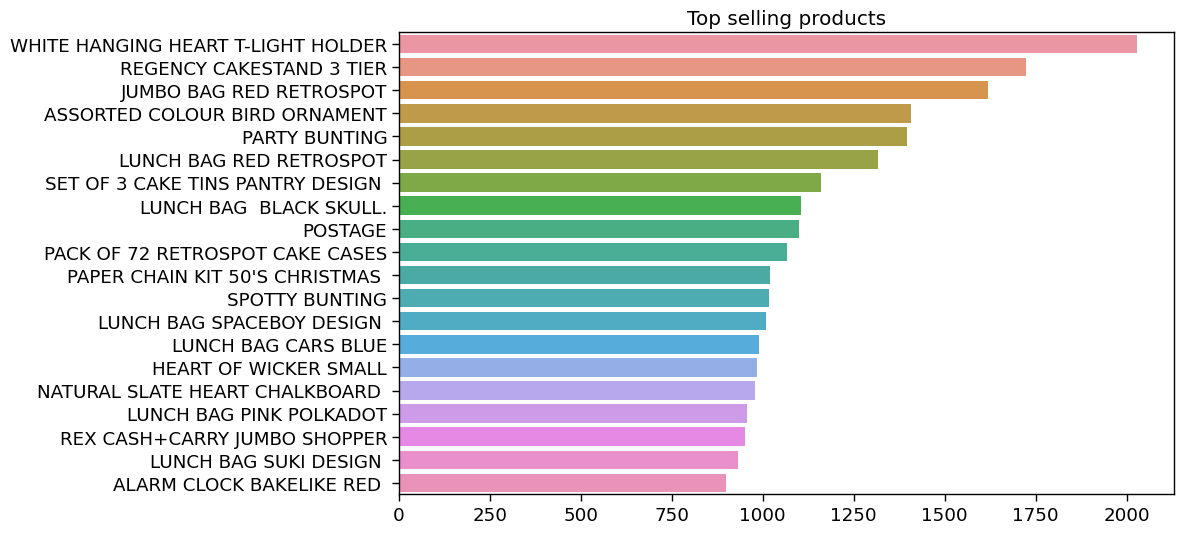

In [568]:
# Let's visualize some top products from the whole range.
top_products = df['Description'].value_counts()[:20]
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values)
plt.title("Top selling products")
plt.show();

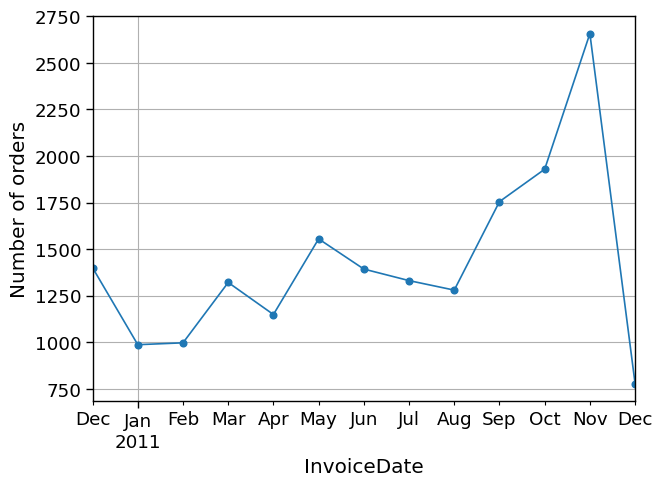

,InvoiceNo
InvoiceDate,
2010-12-31,1400
2011-01-31,987
2011-02-28,997
2011-03-31,1321
2011-04-30,1149
2011-05-31,1555
2011-06-30,1393
2011-07-31,1331
2011-08-31,1280


In [569]:
# Time Series
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df_monthly_orders = df[['InvoiceNo', 'InvoiceDate']]\
                    .set_index('InvoiceDate')\
                    .resample('M')\
                    .nunique()


df_monthly_orders.plot(grid=True, marker='o', legend=False, figsize=(7, 5))
plt.ylabel('Number of orders')
plt.show()
df_monthly_orders

In [570]:
invoice_dec = df.loc[df['InvoiceDate'] >= '2011-12-01', 'InvoiceDate']
print(f'Min date: {invoice_dec.min()} \nMax date: {invoice_dec.max()}')

Min date: 2011-12-01 08:33:00 
Max date: 2011-12-09 12:50:00


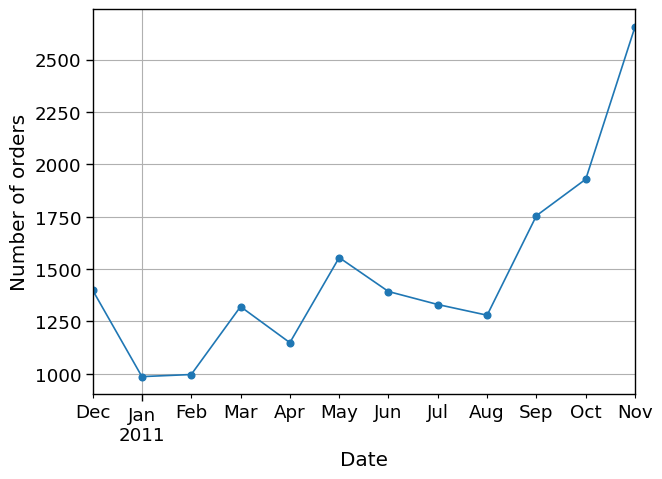

In [571]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

# Time Series
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df_monthly_orders = df[['InvoiceNo', 'InvoiceDate']]\
                    .set_index('InvoiceDate')\
                    .resample('M')\
                    .nunique()


df_monthly_orders.plot(grid=True, marker='o', legend=False, figsize=(7, 5))
plt.ylabel('Number of orders')
plt.xlabel('Date')
plt.show()

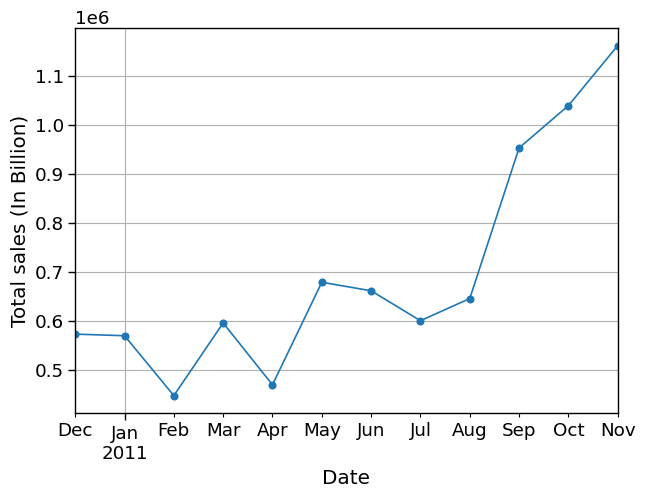

,TotalSales
InvoiceDate,
2010-12-31,572713.890
2011-01-31,569445.040
2011-02-28,447137.350
2011-03-31,595500.760
2011-04-30,469200.361
2011-05-31,678594.560
2011-06-30,661213.690
2011-07-31,600091.011
2011-08-31,645343.900


In [572]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

df_monthly_sales = df[['TotalSales', 'InvoiceDate']]\
                    .set_index('InvoiceDate')\
                    .resample('M')\
                    .sum()

df_monthly_sales.plot(grid=True, legend=False, marker='o', figsize=(7, 5))
plt.ylabel('Total sales (In Billion)')
plt.xlabel('Date')
plt.show()

df_monthly_sales

It focuses on customers with more than one invoice in a single month, thus identifying repeat customers based on the frequency of their transactions within the same month.

In [573]:
# Applying the provided code with a slight adjustment, since 'Sales' isn't a column in our cleaned_data.
# We'll use 'TotalSales' instead, which we previously calculated as Quantity * UnitPrice.

invoice_customer_df = df.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'TotalSales': sum,  # Using 'TotalSales' instead of 'Sales'
    'CustomerID': max,
    'Country': max,
}).reset_index()

# Now, apply the second part of the code to find monthly repeat customers.
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

monthly_repeat_customers_df


InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    152
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [574]:
monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1664
Freq: M, Name: CustomerID, dtype: int64

In [575]:
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.052770
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.512019
Freq: M, Name: CustomerID, dtype: float64

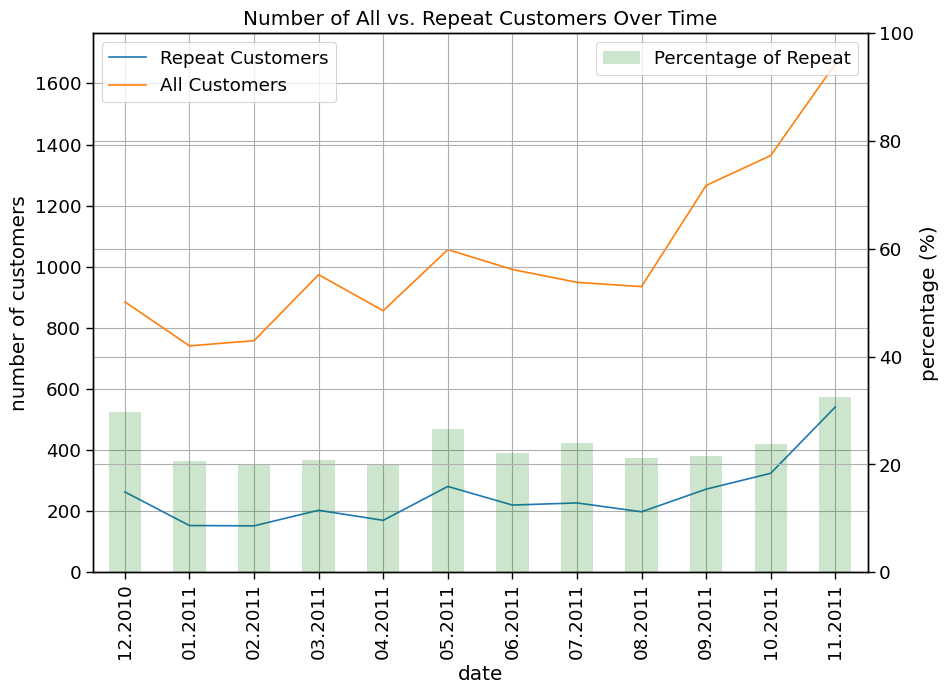

In [576]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
    figsize=(10,7)
)

pd.DataFrame(monthly_unique_customers_df.values).plot(
    ax=ax,
    grid=True
)


ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], 
    rotation=45
)

plt.show()

In [577]:
# Revenue
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').agg({"TotalSales":'sum'})

monthly_rev_repeat_customers_df

,TotalSales
InvoiceDate,
2010-12-31,359170.60
2011-01-31,222124.00
2011-02-28,191067.27
2011-03-31,267390.48
2011-04-30,195474.18
2011-05-31,378197.04
2011-06-30,376307.26
2011-07-31,317475.00
2011-08-31,317134.25


In [578]:
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/df_monthly_sales * 100.0
monthly_rev_repeat_customers_df

,TotalSales
InvoiceDate,
2010-12-31,359170.60
2011-01-31,222124.00
2011-02-28,191067.27
2011-03-31,267390.48
2011-04-30,195474.18
2011-05-31,378197.04
2011-06-30,376307.26
2011-07-31,317475.00
2011-08-31,317134.25


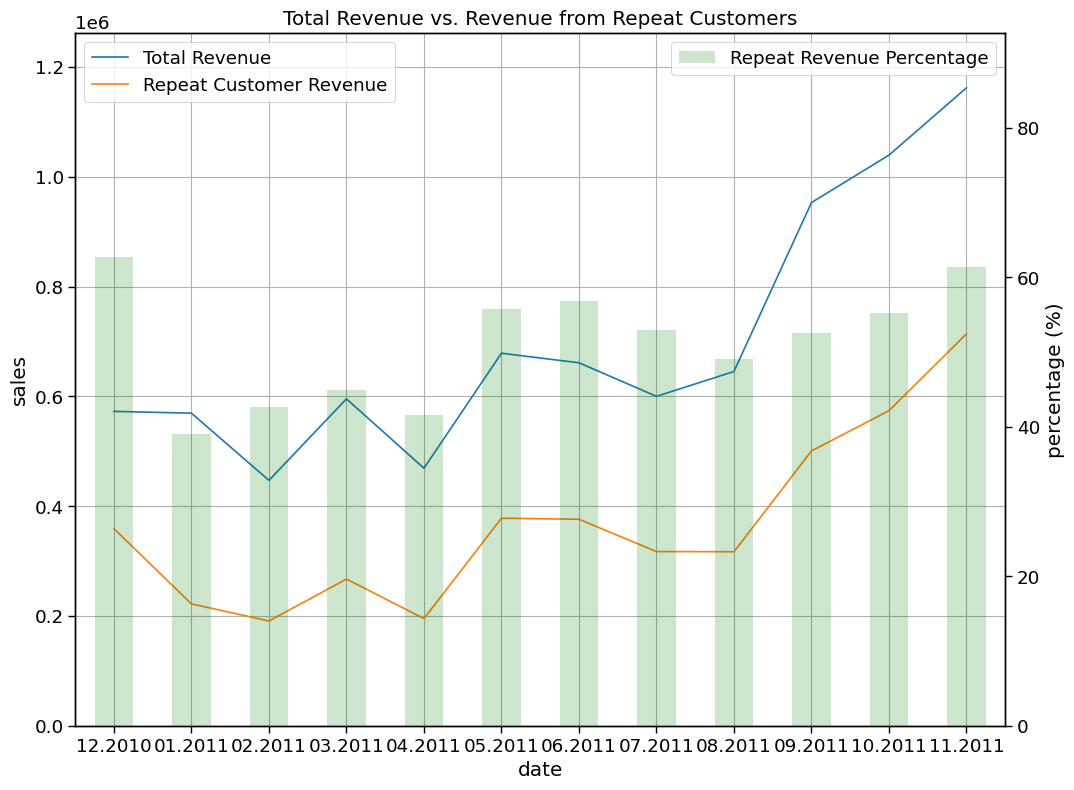

In [579]:
ax = pd.DataFrame(df_monthly_sales.values).plot(figsize=(12,9))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
    ax=ax,
    grid=True,
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'], loc='upper left')

ax.set_ylim([0, max(df_monthly_sales.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2
)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([
    x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index
])

plt.show()

If you observe that more than 20% of your customers are making multiple transactions each month, it signals several key insights and opportunities for your business. Let's delve into what this could mean and how you can leverage this behavior:

### 1. **High Customer Engagement:**
- **Insight:** A significant proportion of your customer base is actively engaged with your brand, indicating strong interest or loyalty. This engagement level is a positive sign of customer satisfaction and interest in your products or services.
- **Action:** Leverage this engagement by introducing loyalty programs or rewards for frequent purchases to encourage continued patronage and to turn these customers into brand advocates.

### 2. **Opportunity for Personalization:**
- **Insight:** Customers making frequent transactions likely have diverse needs and preferences. Analyzing their purchasing patterns can provide insights into their behaviors and preferences.
- **Action:** Use data analytics to personalize marketing communications, offers, and product recommendations based on their past purchasing behavior, increasing the relevance of your messages and offers.

### 3. **Subscription Model Potential:**
- **Insight:** If customers are purchasing frequently, they might benefit from a subscription model, which could offer convenience and potentially better pricing.
- **Action:** Consider introducing a subscription service for your most commonly purchased products or services, thereby locking in repeat business and ensuring steady cash flow.

### 4. **Referral Program Advantage:**
- **Insight:** Engaged and satisfied customers are more likely to recommend your business to others.
- **Action:** Implement a referral program that rewards your frequent shoppers for bringing in new customers, effectively utilizing their satisfaction to attract more business.

### 5. **Increased Lifetime Value (LTV):**
- **Insight:** Customers who transact frequently are likely to have a higher lifetime value to your business than those who purchase sporadically.
- **Action:** Focus on retaining these high-value customers through excellent customer service, exclusive offers, and early access to new products or services.

### 6. **Feedback Loop for Improvement:**
- **Insight:** Regular customers are a valuable source of feedback on your offerings and customer experience.
- **Action:** Engage with these customers for feedback through surveys, focus groups, or one-on-one interactions to identify areas for improvement and innovation.

### 7. **Predictive Inventory Management:**
- **Insight:** Predictable purchasing patterns help in forecasting demand more accurately.
- **Action:** Use this data to improve your inventory management, ensuring that popular items are always in stock, thereby reducing the risk of stockouts and lost sales.

### 8. **Segmented Marketing Strategies:**
- **Insight:** Not all customers are the same; frequent buyers might have different needs and preferences compared to one-time or infrequent buyers.
- **Action:** Develop segmented marketing strategies targeting this specific customer segment with tailored messages, offers, and promotions to maintain and increase their engagement levels.

By analyzing the behavior of these frequent buyers and understanding their needs and preferences, you can create more targeted and effective marketing strategies, improve product offerings, and ultimately, increase the overall satisfaction and loyalty of your customer base.

In [580]:
# Monthly cohort analysis groups customers into cohorts based on their first purchase month
# and then tracks their subsequent behavior over time.

# Create the cohort based on the first purchase date
cohort_data = df.groupby('CustomerID')['InvoiceDate'].min().reset_index()
cohort_data.rename(columns = {'InvoiceDate':'CohortDate'}, inplace=True)

# Extract year and month from CohortDate and InvoiceDate
cohort_data['CohortYearMonth'] = cohort_data['CohortDate'].dt.to_period('M')
df['InvoiceYearMonth'] = df['InvoiceDate'].dt.to_period('M')


# Merge the cohort dataframe with the cleaned data
merged_cohort = pd.merge(df, cohort_data, on='CustomerID')

# Calculate the difference in months for the CohortIndex
merged_cohort['CohortIndex'] = (
    (merged_cohort['InvoiceYearMonth'].dt.year - merged_cohort['CohortYearMonth'].dt.year) * 12 +
    (merged_cohort['InvoiceYearMonth'].dt.month - merged_cohort['CohortYearMonth'].dt.month)
)

# Count monthly active customers from each cohort
cohort_counts = merged_cohort.groupby(['CohortYearMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# Create a pivot table with CohortYearMonth as rows, CohortIndex as columns, and CustomerID counts as values
cohort_pivot = cohort_counts.pivot(index='CohortYearMonth', columns='CohortIndex', values='CustomerID')

cohort_pivot.head()  # Display the first few rows of the cohort pivot table


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11
CohortYearMonth,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,NaN,NaN,NaN,NaN


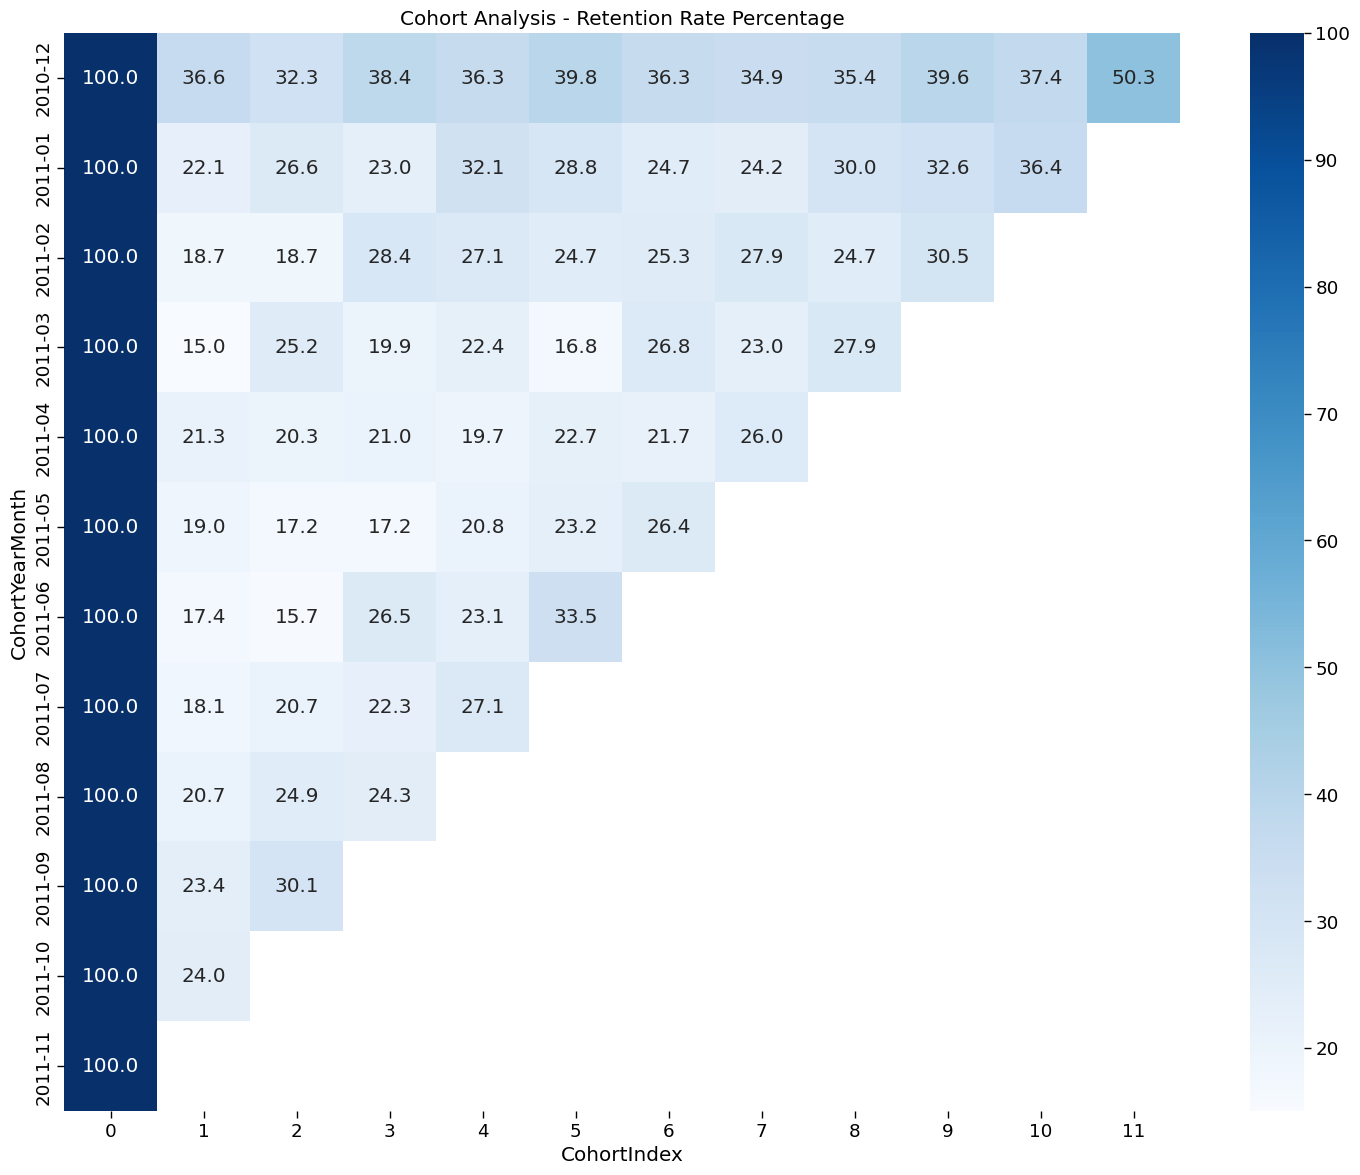

In [581]:
# To generate the retention rates as percentages, we will first need to calculate the total number of customers in the first month of the cohort.
# Then, we will divide the number of active customers in each subsequent month by the initial cohort size.

# Calculate initial cohort sizes (total number of customers in the first month of the cohort)
cohort_sizes = cohort_pivot.iloc[:,0]

# Calculate retention as a percentage
retention_matrix = cohort_pivot.divide(cohort_sizes, axis=0)

# Convert the retention matrix into percentage format
retention_matrix_percentage = retention_matrix.round(4) * 100

# Now we plot the retention matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 14))
plt.title('Cohort Analysis - Retention Rate Percentage')
sns.heatmap(data=retention_matrix_percentage, annot=True, fmt='.1f', cmap='Blues')
plt.show()


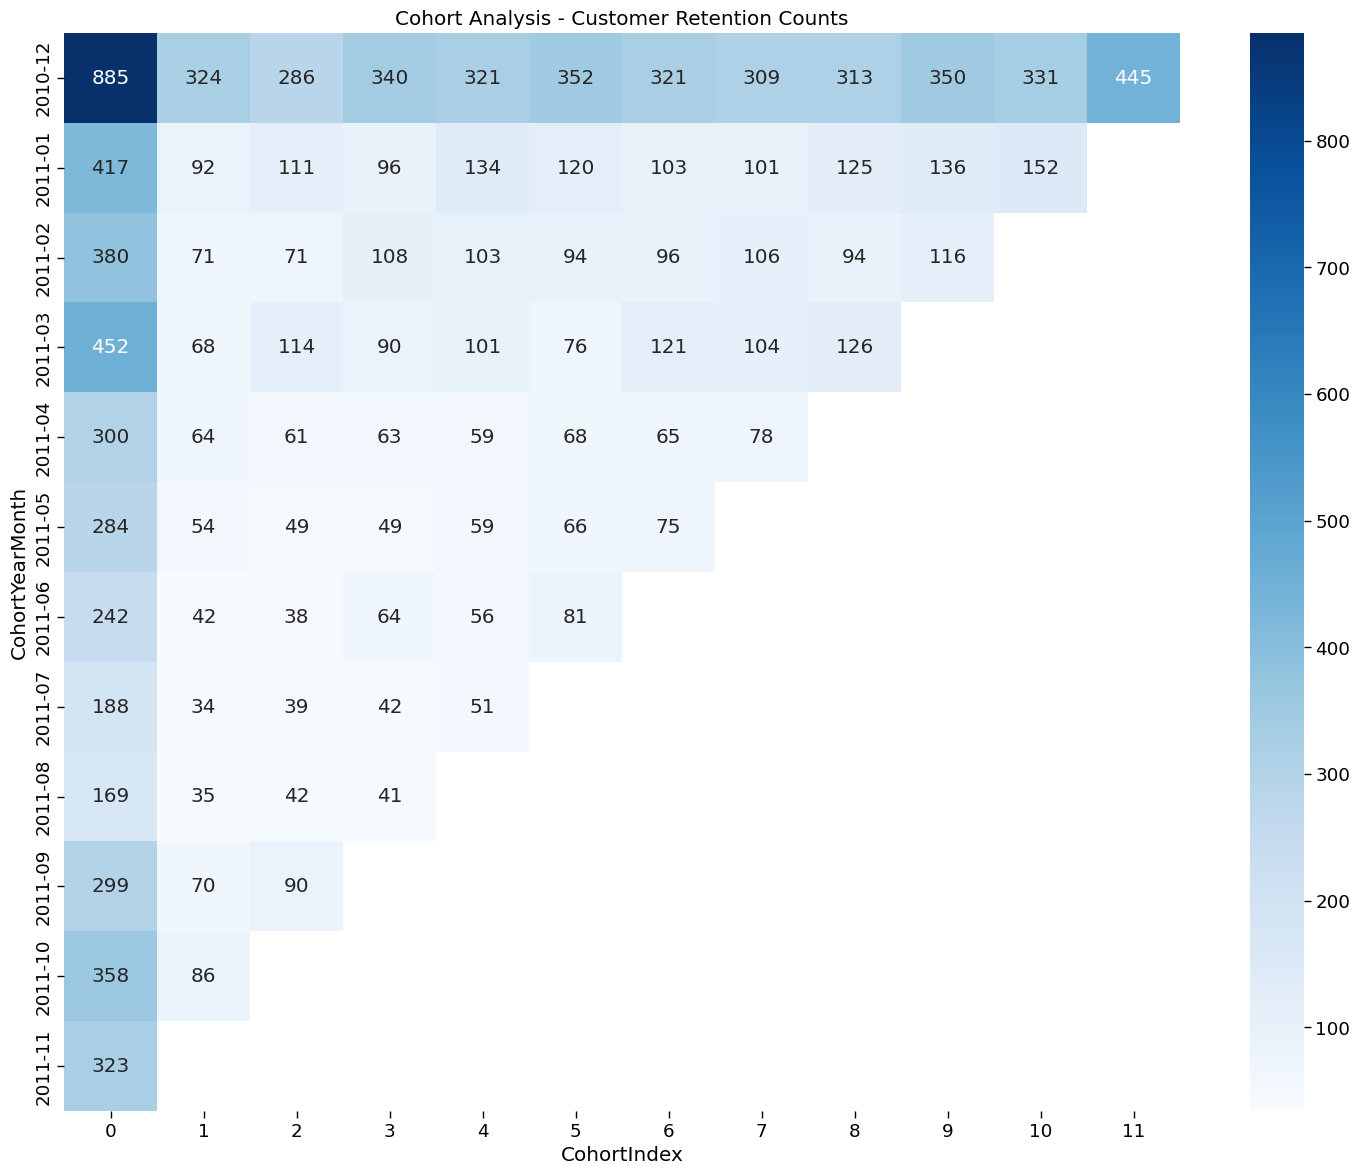

In [582]:
# We will now plot the actual customer retention counts from the cohort analysis.
# This is the actual number of customers from each cohort who made a purchase in subsequent months.

plt.figure(figsize=(18, 14))
plt.title('Cohort Analysis - Customer Retention Counts')
sns.heatmap(data=cohort_pivot, annot=True, fmt='.0f', cmap='Blues')
plt.show()


In [583]:
# RFM Analysis (Ranking-Based Method or Quartile method approximation)

df['date'] = pd.DatetimeIndex(df['InvoiceDate']).date
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_isUK,TotalSales,InvoiceYearMonth,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,UK,15.30,2010-12,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34,2010-12,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,UK,22.00,2010-12,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34,2010-12,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34,2010-12,2010-12-01


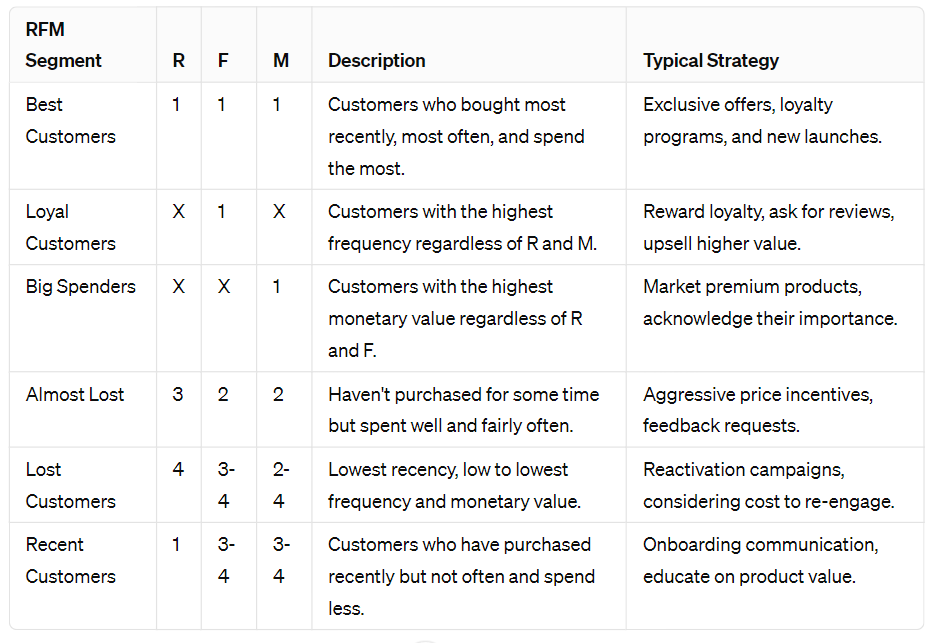

In [584]:
now = df['date'].max() + pd.Timedelta(days=1)
recency = df.groupby(['CustomerID'])['date'].max().reset_index()
recency.columns = ['CustomerID', 'LastPurchase']
recency['Recency'] = recency['LastPurchase'].apply(lambda x: (now - x).days)
recency.drop('LastPurchase', axis=1, inplace=True)

recency.head()

,CustomerID,Recency
0,12346.0,317
1,12347.0,31
2,12348.0,67
3,12349.0,10
4,12350.0,302


In [585]:
frequency = df.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep='first')\
            .groupby(['CustomerID'])['InvoiceDate']\
            .count()\
            .reset_index()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,6
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [586]:
monetary = df.groupby(['CustomerID']).agg({'TotalSales':'sum'}).reset_index()
monetary.columns = ['CustomerID','Monetary']
monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4085.18
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [587]:
rfm_table = df.groupby(['CustomerID']).size().reset_index().drop(0, axis=1)

# Merge the data
rfm_table = rfm_table \
    .merge(recency, on = 'CustomerID') \
    .merge(frequency, on = 'CustomerID') \
    .merge(monetary, on = 'CustomerID')

# Set CustomerID as index
rfm_table = rfm_table.set_index('CustomerID')

rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,317,1,77183.60
12347.0,31,6,4085.18
12348.0,67,4,1797.24
12349.0,10,1,1757.55
12350.0,302,1,334.40


In [588]:
rfm_table.describe()

,Recency,Frequency,Monetary
count,4297.000000,4297.000000,4297.000000
mean,91.481499,4.131720,1953.273240
std,98.577826,7.412705,8355.832473
min,1.000000,1.000000,2.900000
25%,16.000000,1.000000,304.470000
50%,50.000000,2.000000,657.300000
75%,146.000000,4.000000,1600.860000
max,365.000000,200.000000,268478.000000


The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

Note: Quintiles (score from 1-5) offer better granularity, in case the business needs that but it will be more challenging to create segments since we will have 555 possible combinations. So, we will use quartiles.

In [589]:
quantiles = rfm_table.quantile(q=[0.25, 0.5, 0.75])
quantiles

,Recency,Frequency,Monetary
0.25,16.0,1.0,304.47
0.50,50.0,2.0,657.30
0.75,146.0,4.0,1600.86


In [590]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [591]:
#create rfm segmentation table
rfm_segmentation = rfm_table.copy()
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,317,1,77183.60,1,1,4
12347.0,31,6,4085.18,3,4,4
12348.0,67,4,1797.24,2,3,4
12349.0,10,1,1757.55,4,1,4
12350.0,302,1,334.40,1,1,2


In [592]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346.0,317,1,77183.60,1,1,4,114
12347.0,31,6,4085.18,3,4,4,344
12348.0,67,4,1797.24,2,3,4,234
12349.0,10,1,1757.55,4,1,4,414
12350.0,302,1,334.40,1,1,2,112


In [593]:
def classification(score):
    if score == '444':
        return 'Best Customers'
    if score[1] == '4':
        return 'Loyal Customers'
    if score[2] == '4':
        return 'Big Spenders'
    if score[0] == '4':
        return 'Recent Customers'
    if score == '233':
        return 'Almost Lost'
    if score[0] == '1':
        return 'Lost Customers'
#     if (score[0] == '1') and\
#         (score[1] == '2' or score[1] == '1') and\
#         (score[2] == '3' or score[2] == '2' or score[2] == '1' ):
#             return 'Lost Customers'
#     if (score[0] == '4') and\
#         (score[1] == '2' or score[1] == '1') and\
#         (score[2] == '2' or score[2] == '1'):
#             return 'Recent Customers'


rfm_segmentation['Cluster'] = rfm_segmentation['RFMScore'].apply(classification)


In [594]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  433
Loyal Customers:  1056
Big Spenders:  1074
Almost Lost:  100
Lost Customers:  14
Lost Cheap Customers:  442


<Figure size 1000x600 with 0 Axes>

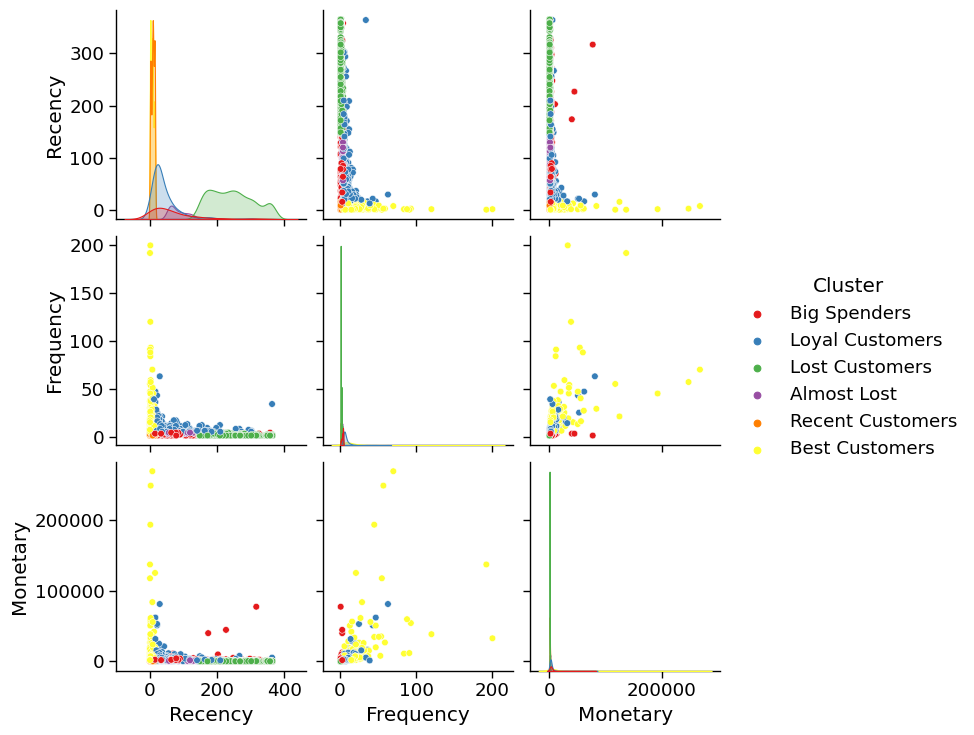

In [595]:
# Create a scatter plot with color-coding for segments
plt.figure(figsize=(10, 6))
sns.pairplot(
    data=rfm_segmentation[['Recency', 'Frequency', 'Monetary', 'Cluster']],
    hue='Cluster',
    palette='Set1',  
)
# plt.title('Customer Segmentation Scatter Plot')
plt.xlabel('Recency')
plt.ylabel('Frequency')
# plt.xticks(rotation=90)
# plt.legend(title='Segment', loc='upper right')
plt.show()

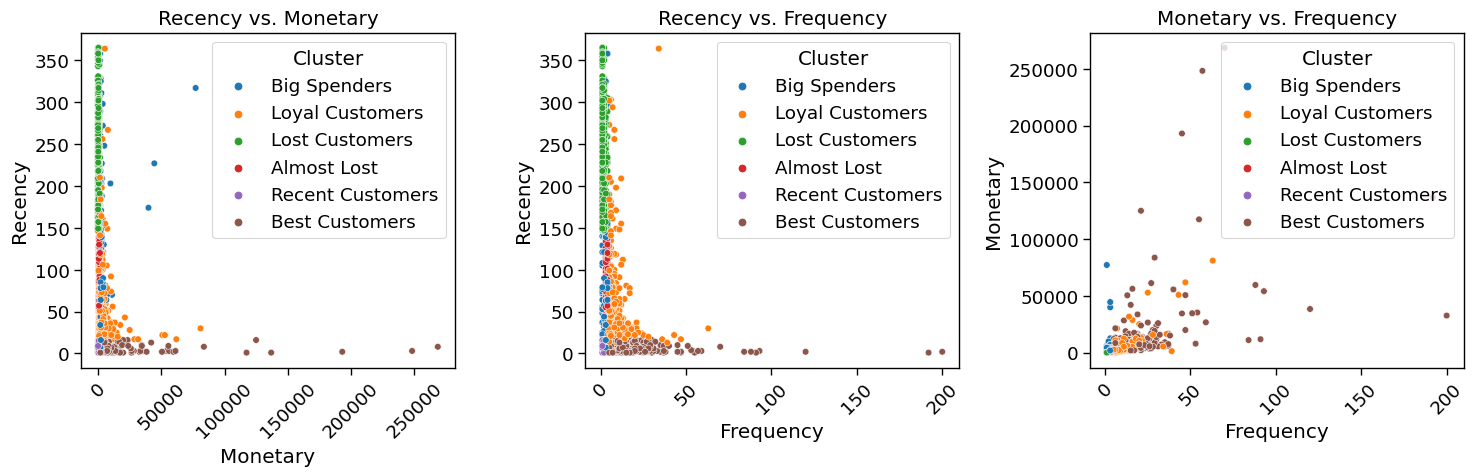

In [596]:
# Create subplots for boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Custom colors for the bars
colors = ['lightblue', 'lightcoral', 'lightgreen']

# Boxplot of Cluster vs. Recency
sns.scatterplot(x='Frequency', y='Recency', hue='Cluster', data=rfm_segmentation, ax=axes[1])
axes[1].set_title('Recency vs. Frequency')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Recency')
axes[1].tick_params(axis='x', labelrotation=45)


# # Boxplot of Cluster vs. Frequency
sns.scatterplot(x='Monetary', y='Recency', hue='Cluster', data=rfm_segmentation, ax=axes[0])
axes[0].set_title('Recency vs. Monetary')
axes[0].set_xlabel('Monetary')
axes[0].set_ylabel('Recency')
axes[0].tick_params(axis='x', labelrotation=45)


# # Boxplot of Cluster vs. Monetary
sns.scatterplot(x='Frequency', y='Monetary',hue='Cluster', data=rfm_segmentation, ax=axes[2],)
axes[2].set_title('Monetary vs. Frequency')
axes[2].set_xlabel('Frequency')
axes[2].set_ylabel('Monetary')
axes[2].tick_params(axis='x', labelrotation=45)



# Adjust layout
plt.tight_layout()

# Show the boxplots
plt.show()

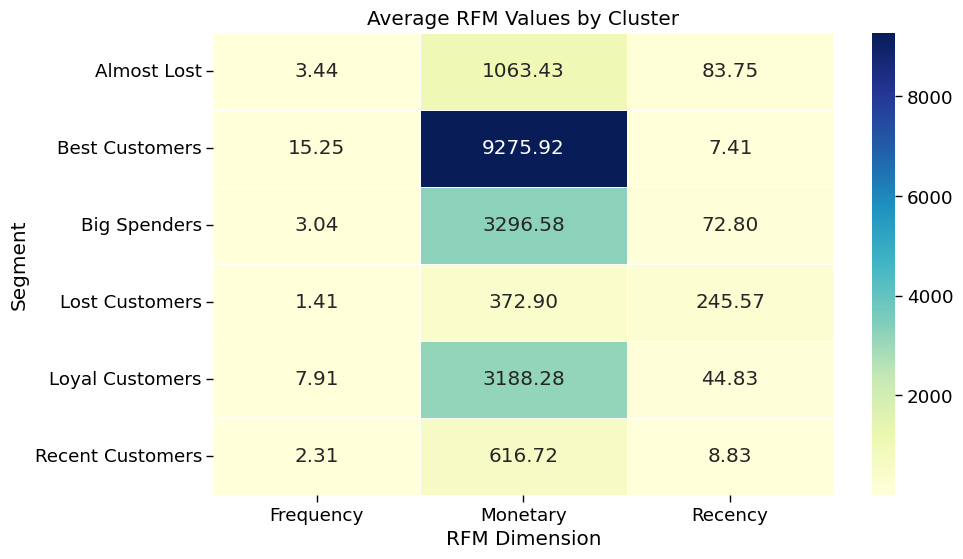

In [597]:
# Create a pivot table with the reordered segment order
pivot_table = rfm_segmentation.pivot_table(
    values=['Recency', 'Frequency', 'Monetary'],
    index='Cluster',
    aggfunc='mean'
)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    annot=True,  # Display values in each cell
    cmap='YlGnBu',  # Choose a color map
    fmt='.2f',  # Format for displaying values
    linewidths=0.5,  # Add linewidths between cells
)
plt.title('Average RFM Values by Cluster')
plt.xlabel('RFM Dimension')
plt.ylabel('Segment')
plt.show()

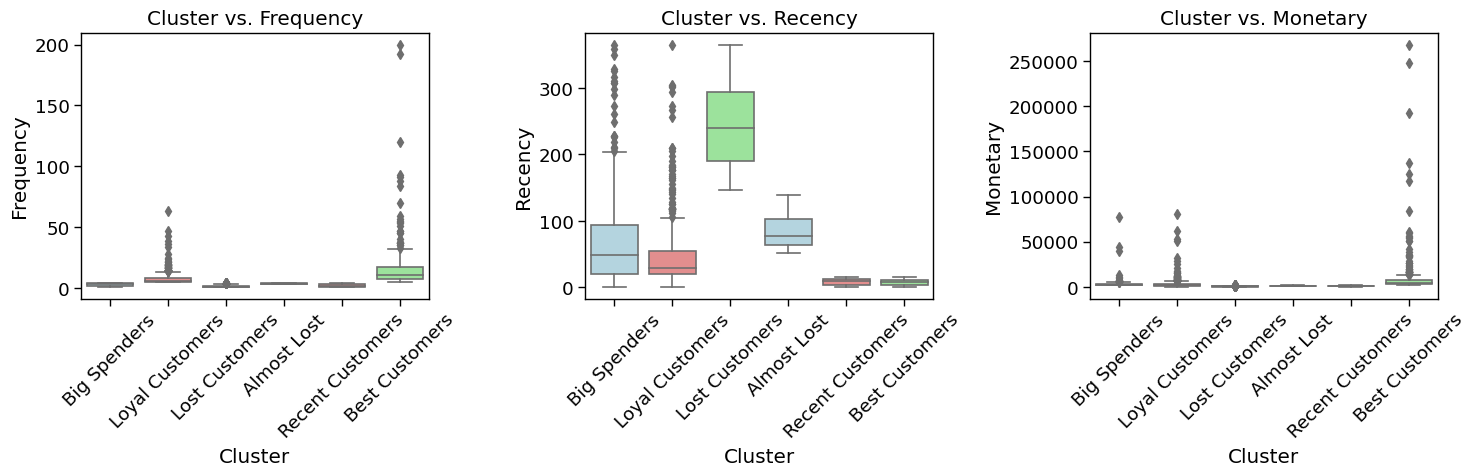

In [598]:
# Create subplots for boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Custom colors for the bars
colors = ['lightblue', 'lightcoral', 'lightgreen']

# Boxplot of Cluster vs. Recency
sns.boxplot(x='Cluster', y='Recency', data=rfm_segmentation, ax=axes[1], palette=colors)
axes[1].set_title('Cluster vs. Recency')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Recency')
axes[1].tick_params(axis='x', labelrotation=45)


# Boxplot of Cluster vs. Frequency
sns.boxplot(x='Cluster', y='Frequency', data=rfm_segmentation, ax=axes[0], palette=colors)
axes[0].set_title('Cluster vs. Frequency')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', labelrotation=45)


# Boxplot of Cluster vs. Monetary
sns.boxplot(x='Cluster', y='Monetary', data=rfm_segmentation, ax=axes[2], palette=colors)
axes[2].set_title('Cluster vs. Monetary')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Monetary')
axes[2].tick_params(axis='x', labelrotation=45)



# Adjust layout
plt.tight_layout()

# Show the boxplots
plt.show()

C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_2732\1650366777.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_table.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_2732\1650366777.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

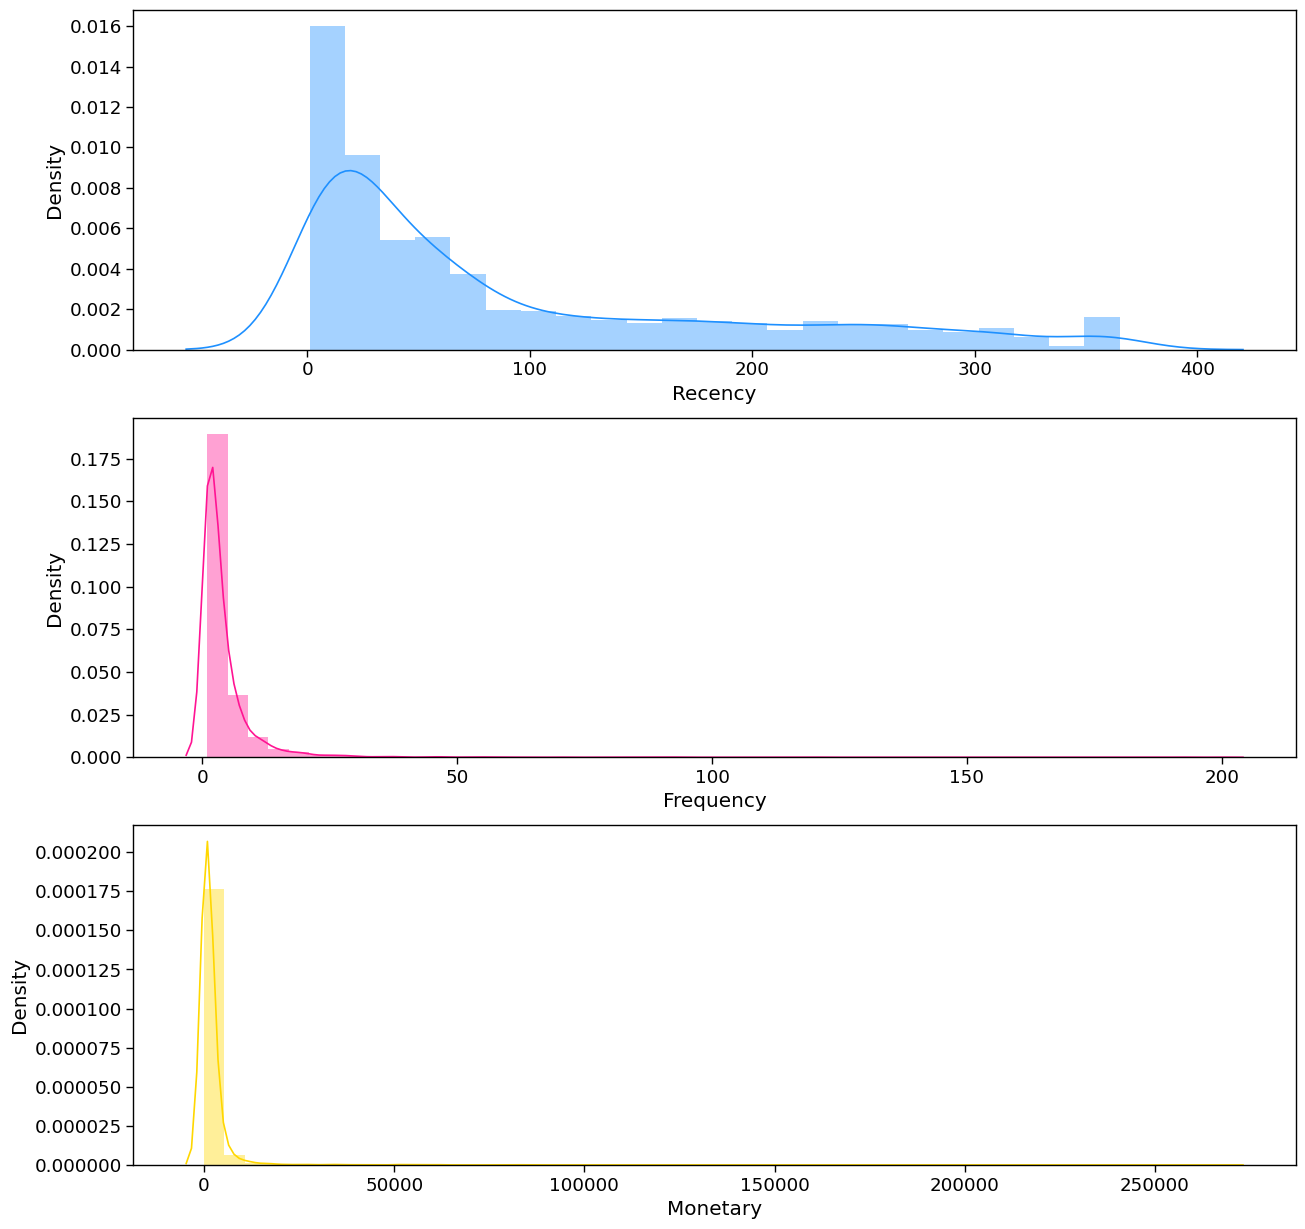

In [599]:
# RFM with K-Means

# plot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(rfm_table.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(rfm_table.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(rfm_table.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
# plt.xlim(50,75);
plt.show();

In [600]:
rfm_table.describe()

,Recency,Frequency,Monetary
count,4297.000000,4297.000000,4297.000000
mean,91.481499,4.131720,1953.273240
std,98.577826,7.412705,8355.832473
min,1.000000,1.000000,2.900000
25%,16.000000,1.000000,304.470000
50%,50.000000,2.000000,657.300000
75%,146.000000,4.000000,1600.860000
max,365.000000,200.000000,268478.000000


Here we can observe that the data is highly skewed. So we have to transform and scale the data first because K-Means assumes that the variables should have a symmetric distributions(not skewed) and they should have same average values as well as same variance.

In [601]:
# Scale the data

scaler = StandardScaler()
rfm_table_scaled = scaler.fit_transform(rfm_table_scaled)

rfm_table_scaled = pd.DataFrame(rfm_table_scaled, columns = rfm_table.columns, index = rfm_table.index)

rfm_table_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,2.288292,-0.403999,9.004379
12347.0,-0.613418,0.380297,0.255170
12348.0,-0.248168,-0.265594,-0.018676
12349.0,-0.826481,-0.071827,-0.023426
12350.0,2.136104,-0.330183,-0.193764


In [602]:
rfm_table_scaled.describe()

,Recency,Frequency,Monetary
count,4.297000e+03,4.297000e+03,4297.000000
mean,1.074826e-17,-4.960736e-18,0.000000
std,1.000116e+00,1.000116e+00,1.000116
min,-9.177935e-01,-4.039992e-01,-0.233442
25%,-7.656059e-01,-3.301831e-01,-0.197347
50%,-4.206474e-01,-2.240724e-01,-0.155116
75%,5.533532e-01,3.889755e-02,-0.042181
max,2.775292e+00,3.362062e+01,31.900561


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Baha Tegar\anaconda3\Lib\si

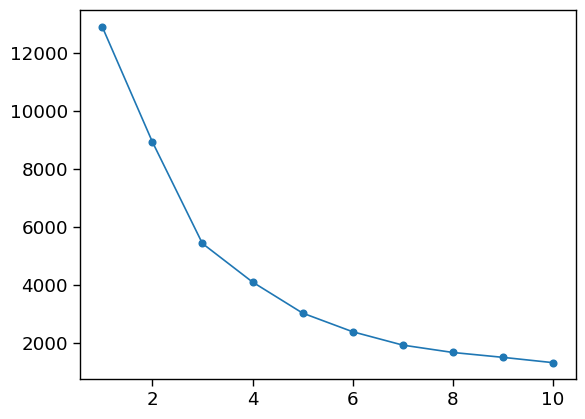

In [603]:
# find WCSS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(rfm_table_scaled)
    wcss.append(kmeans.inertia_)

# plot elbow graph
plt.plot(range(1,11),wcss,marker='o');

From the elbow graph, it seems that good number of cluster would be either 2 or 3 as after that, its a smooth curve i.e. no change of orientation. but to overcome that confusion, we will use silhouette score method to find the optimum number of clusters because it is often much better in figuring out the number of valid clusters than the elbow method

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 2: 0.9383723959163424


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 3: 0.5960826987372743


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 4: 0.5943253954623618


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 5: 0.6099376088567086


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 6: 0.5905492025391246


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 7: 0.5257836362630898


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 8: 0.5208550215535717


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 9: 0.5112601326089734


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 10: 0.4245220510307666


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 11: 0.42539933168471156


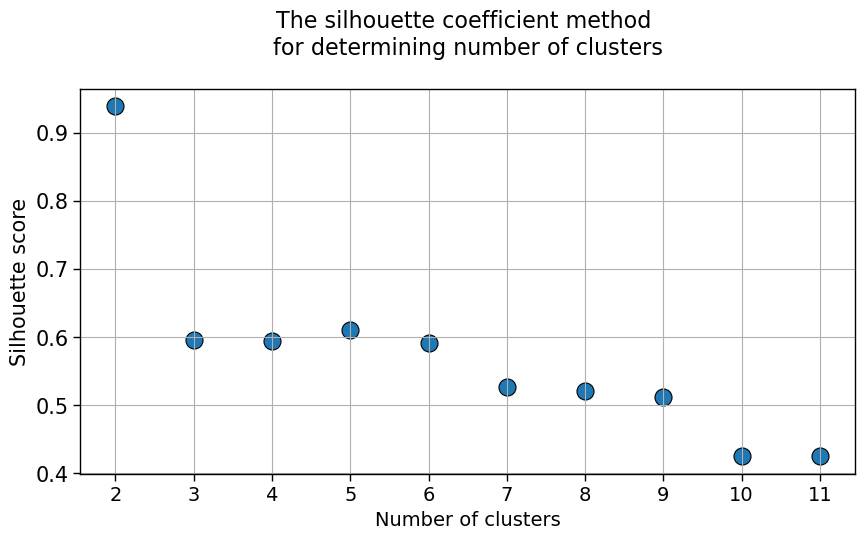

In [604]:
from sklearn.metrics import silhouette_score
wcss_silhouette = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0,init='k-means++').fit(rfm_table_scaled)
    preds = km.predict(rfm_table_scaled)    
    silhouette = silhouette_score(rfm_table_scaled,preds)
    wcss_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

plt.figure(figsize=(10,5))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=wcss_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [605]:
kmeans = KMeans(n_clusters=3, random_state=1, init='k-means++')
kmeans.fit(rfm_table_scaled)
cluster_labels = kmeans.labels_

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [606]:
kmeans

KMeans(n_clusters=3, random_state=1)

In [607]:
#create rfm segmentation table
rfm_segmentation = rfm_table.copy()
rfm_segmentation['Cluster'] = kmeans.predict(rfm_table_scaled)
rfm_segmentation

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,317,1,77183.60,0
12347.0,31,6,4085.18,1
12348.0,67,4,1797.24,1
12349.0,10,1,1757.55,1
12350.0,302,1,334.40,0
...,...,...,...,...
18280.0,269,1,180.60,0
18281.0,172,1,80.82,0
18282.0,118,1,100.21,1


In [608]:
rfm_segmentation.groupby('Cluster').mean()

,Recency,Frequency,Monetary
Cluster,,,
0,240.146715,1.601260,631.016635
1,39.779389,4.710369,1962.733959
2,5.615385,79.153846,112646.213846


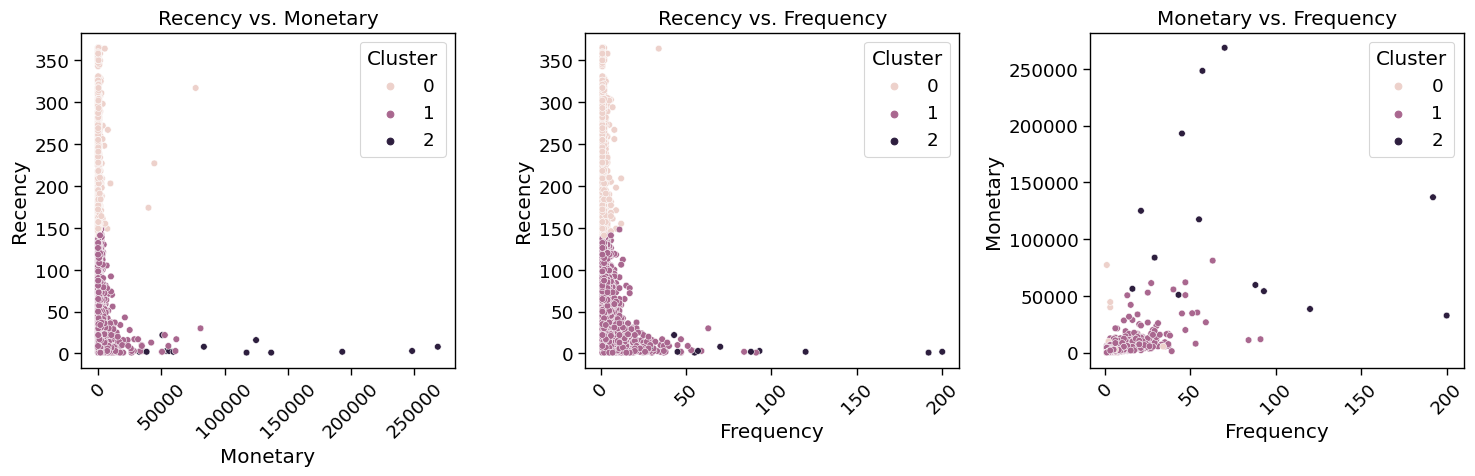

In [609]:
# Create subplots for boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Custom colors for the bars
colors = ['lightblue', 'lightcoral', 'lightgreen']

# Boxplot of Cluster vs. Recency
sns.scatterplot(x='Frequency', y='Recency', hue='Cluster', data=rfm_segmentation, ax=axes[1])
axes[1].set_title('Recency vs. Frequency')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Recency')
axes[1].tick_params(axis='x', labelrotation=45)


# # Boxplot of Cluster vs. Frequency
sns.scatterplot(x='Monetary', y='Recency', hue='Cluster', data=rfm_segmentation, ax=axes[0])
axes[0].set_title('Recency vs. Monetary')
axes[0].set_xlabel('Monetary')
axes[0].set_ylabel('Recency')
axes[0].tick_params(axis='x', labelrotation=45)


# # Boxplot of Cluster vs. Monetary
sns.scatterplot(x='Frequency', y='Monetary',hue='Cluster', data=rfm_segmentation, ax=axes[2],)
axes[2].set_title('Monetary vs. Frequency')
axes[2].set_xlabel('Frequency')
axes[2].set_ylabel('Monetary')
axes[2].tick_params(axis='x', labelrotation=45)



# Adjust layout
plt.tight_layout()

# Show the boxplots
plt.show()

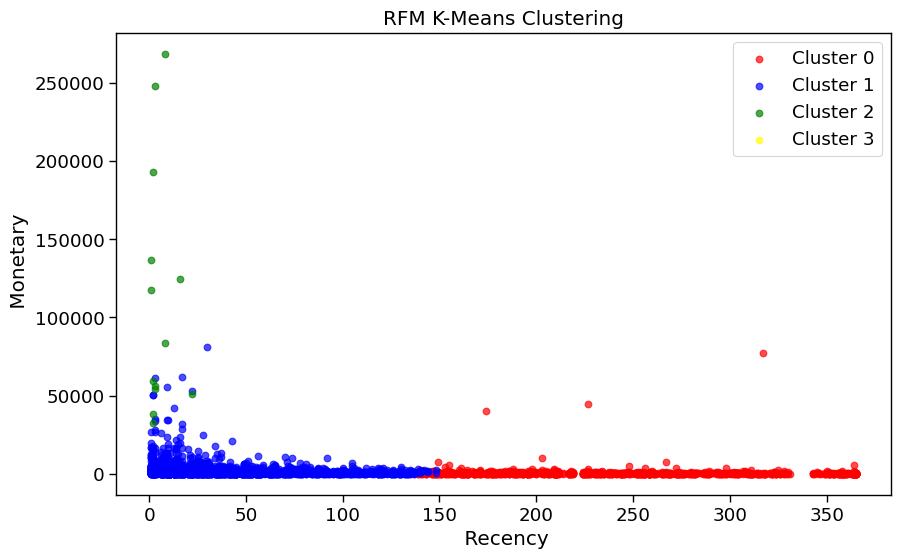

In [610]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a color map for clusters
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3:'yellow'}  # Customize colors as needed

# Plot each data point with cluster-specific color
for cluster_id, color in cluster_colors.items():
    cluster_data = rfm_segmentation[rfm_segmentation['Cluster'] == cluster_id]
    plt.scatter(
        cluster_data['Recency'],
        cluster_data['Monetary'],
        c=color,
        label=f'Cluster {cluster_id}',
        alpha=0.7,  # Adjust transparency
    )

# Add labels and legend
plt.xlabel(' Recency')
plt.ylabel(' Monetary')
plt.title('RFM K-Means Clustering')
plt.legend()

# Show the plot
plt.show()

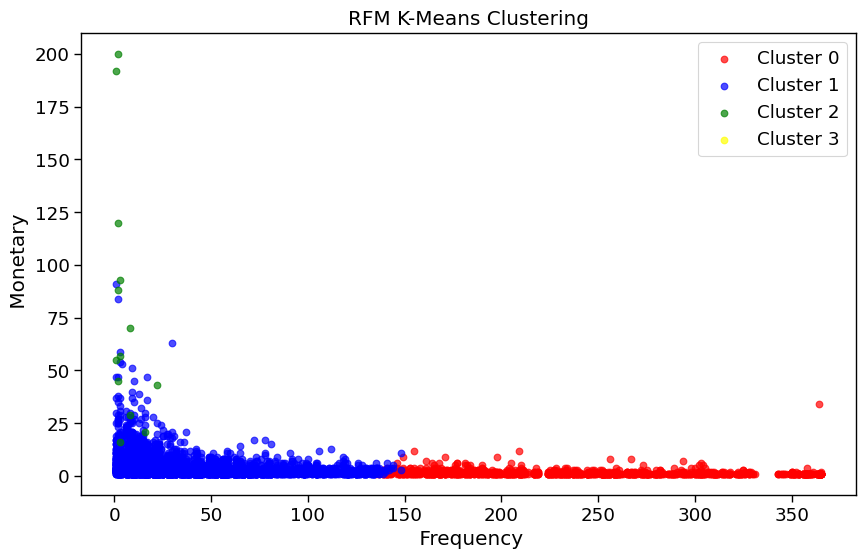

In [611]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a color map for clusters
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3:'yellow'}  # Customize colors as needed

# Plot each data point with cluster-specific color
for cluster_id, color in cluster_colors.items():
    cluster_data = rfm_segmentation[rfm_segmentation['Cluster'] == cluster_id]
    plt.scatter(
        cluster_data['Recency'],
        cluster_data['Frequency'],
        c=color,
        label=f'Cluster {cluster_id}',
        alpha=0.7,  # Adjust transparency
    )

# Add labels and legend
plt.xlabel(' Frequency')
plt.ylabel(' Monetary')
plt.title('RFM K-Means Clustering')
plt.legend()

# Show the plot
plt.show()

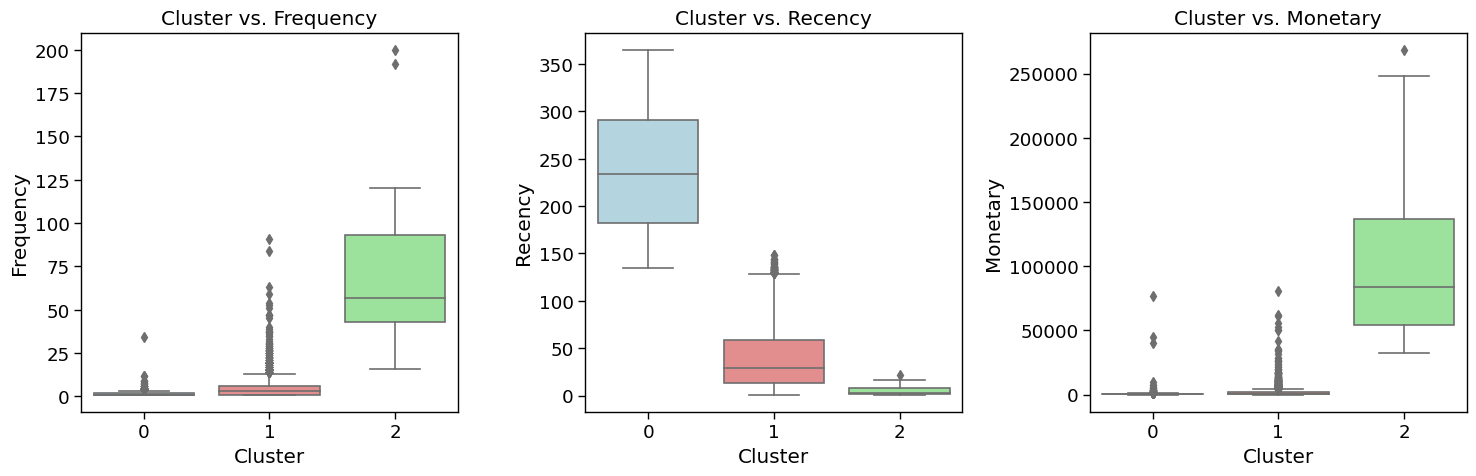

In [612]:
# Create subplots for boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Custom colors for the bars
colors = ['lightblue', 'lightcoral', 'lightgreen']

# Boxplot of Cluster vs. Recency
sns.boxplot(x='Cluster', y='Recency', data=rfm_segmentation, ax=axes[1], palette=colors)
axes[1].set_title('Cluster vs. Recency')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Recency')

# Boxplot of Cluster vs. Frequency
sns.boxplot(x='Cluster', y='Frequency', data=rfm_segmentation, ax=axes[0], palette=colors)
axes[0].set_title('Cluster vs. Frequency')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Frequency')

# Boxplot of Cluster vs. Monetary
sns.boxplot(x='Cluster', y='Monetary', data=rfm_segmentation, ax=axes[2], palette=colors)
axes[2].set_title('Cluster vs. Monetary')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Monetary')

# Adjust layout
plt.tight_layout()

# Show the boxplots
plt.show()

Cluster 0: Low Value

Frequency: Very low frequency of purchases.
Recency: High recency meaning these customers have not made recent purchases.
Monetary: Very low monetary value.

Retention Strategy: This group may include one-time buyers or customers with very low engagement. To re-engage them:

Launch reactivation campaigns offering incentives to return.
Send out reminders of the value your product or service provides.
Use feedback surveys to understand why they have not returned.

Cluster 1: Medium Value

Frequency: Moderate frequency of purchases.
Recency: Medium recency, some recent activity but not the most recent.
Monetary: Moderate monetary value.
Retention Strategy: These are your occasional shoppers, potentially loyal customers who need a nudge:

Introduce a loyalty program to encourage repeat purchases.
Offer personalized promotions based on their purchase history.
Engage them with content relevant to their interests and past purchases.

Cluster 2: High Value

Frequency: High frequency of purchases.
Recency: Low recency indicating recent interaction with the brand.
Monetary: High monetary value.
Retention Strategy: Your most valuable customers, who are frequent and recent buyers:

Create exclusive offers or early access to new products/services.
Provide premium customer support to enhance their experience.
Seek feedback and make them feel valued, enhancing the brand relationship.


- https://www.kaggle.com/code/sarahm/customer-segmentation-using-rfm-analysis#RFM-Analysis
- https://www.kaggle.com/code/alfathterry/customer-segmentation-rfm#Segmentasi-Customer-Menggunakan-K-means
- https://www.kaggle.com/code/nitin194/online-store-rfm-cohort-analysis/notebook#RFM-Analysis
- https://www.kaggle.com/code/regivm/rfm-analysis-tutorial